In [2]:
import pandas as pd

df = pd.read_csv('lung_disease_data.csv')

✅ 1. Categorical Feature Distribution
Bar plots of:

Gender, Smoking Status, Disease Type, Treatment Type

Bar plot of Recovered

✅ 2. Recovery Rate vs Categories
Grouped bar plots of Recovered split by:

Gender

Smoking Status

Disease Type

Treatment Type

✅ 3. Numeric Feature Summary
df.describe() on numeric columns

✅ 4. Distribution of Numeric Features
Histograms of:

Age

Lung Capacity

Hospital Visits

✅ 5. Boxplots vs Target
Boxplots of Age, Lung Capacity, Hospital Visits grouped by Recovered

✅ 6. (Optional) Correlation Heatmap
Correlation matrix of numeric features

Helps you check collinearity if needed

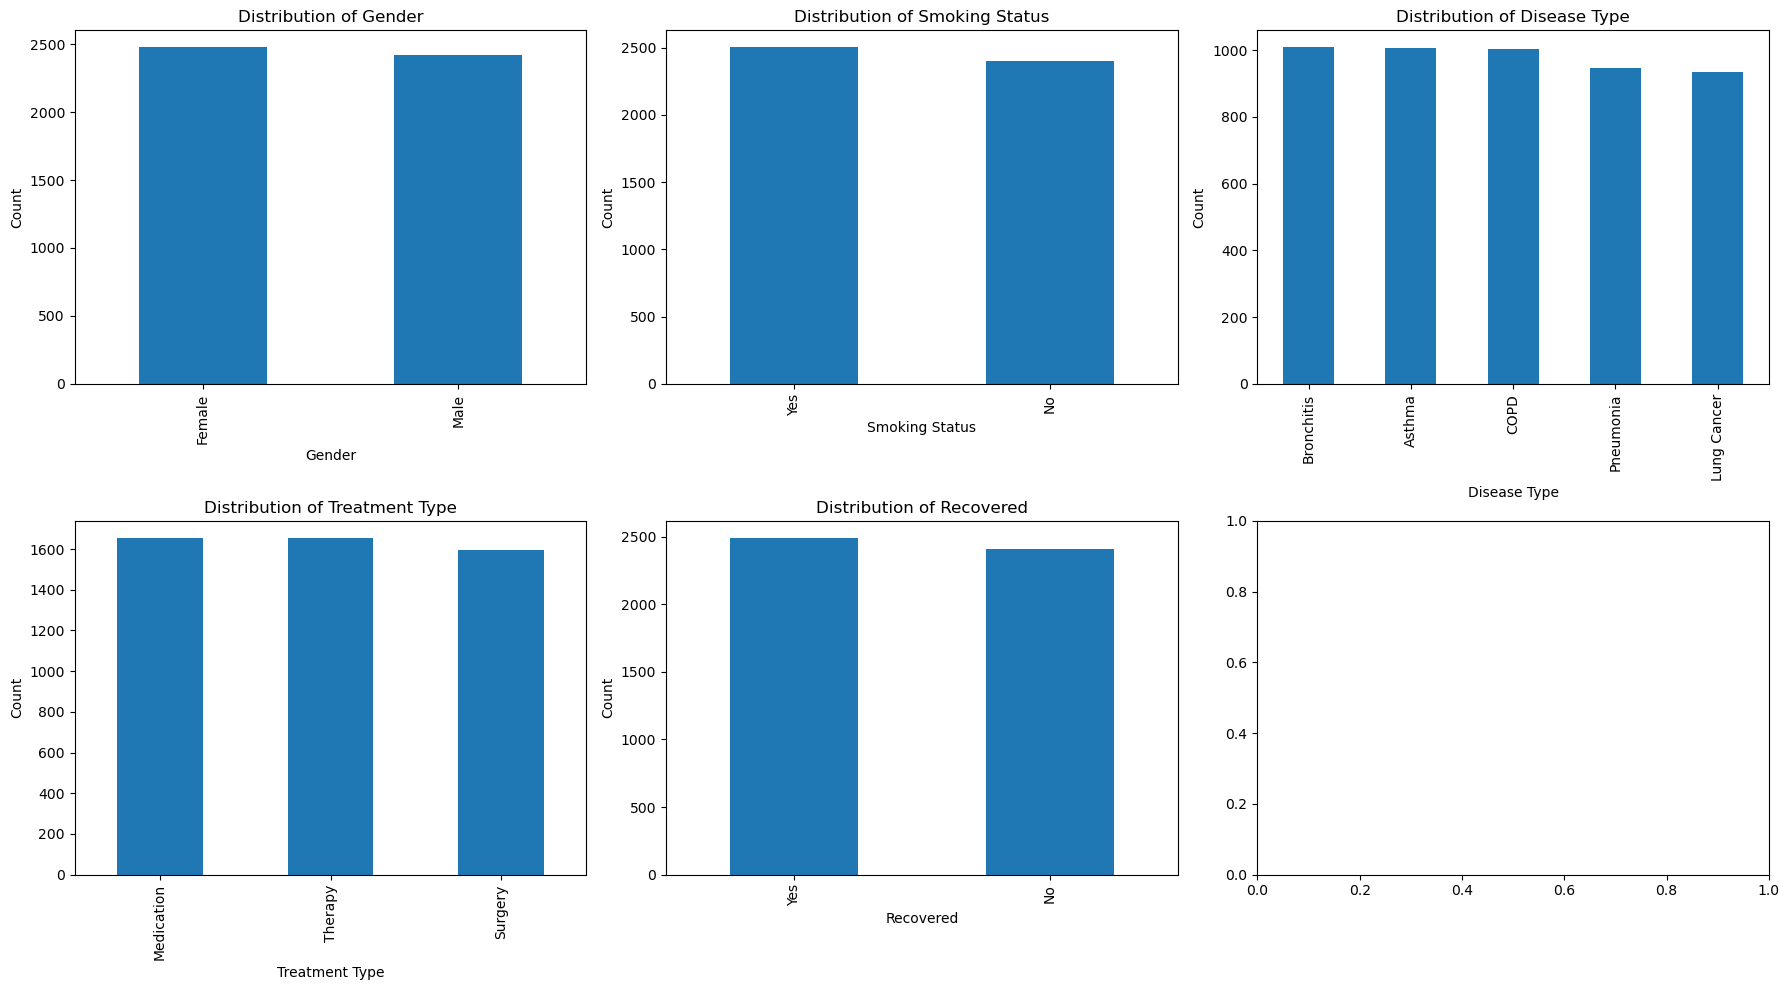

In [3]:
import matplotlib.pyplot as plt

categoricals = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, col in enumerate(categoricals):
    df[col].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

There are slightly more females than males in the dataset.

A majority of patients are smokers, which may impact lung health outcomes.

Bronchitis is the most common disease type, followed closely by Asthma and COPD.

Medication is the most common treatment method, while surgery is the least common.

The target variable (Recovered) shows a slight majority of patients recovered, indicating no severe class imbalance.

📊 Step 1 Bar Plot Insights
1. Gender
Female patients are slightly more common than males.

Distribution is relatively balanced, which is good for modeling — no need for gender-based resampling.

2. Smoking Status
Majority of patients are smokers (~2500 vs ~2400).

Fairly balanced again, suggesting smoking status will not bias the model just due to quantity.

3. Disease Type
Most common: Bronchitis (~1300)

Least common: Lung Cancer (~900)

Reasonably well-distributed across all five types.

Suggests the model will have representative learning for each disease.

4. Treatment Type
Most common: Medication

Least common: Surgery

Indicates some treatment types might be underrepresented.

We should be mindful if surgery outcomes appear skewed later (especially in Recovered-based plots).

5. Recovered (Target Variable)
Slightly more patients recovered (Yes) than not (~2800 vs ~2400).

This is important: the target variable is not significantly imbalanced, so basic classification models should work without needing resampling.

Class balance is good for model performance evaluation (accuracy, precision, recall won’t be skewed).

✅ Conclusion from Step 1
No class imbalance problems in any of the categorical features or target.

All classes are represented sufficiently.

The dataset is well-structured for training classification models — no need for major preprocessing adjustments based on class counts alone.

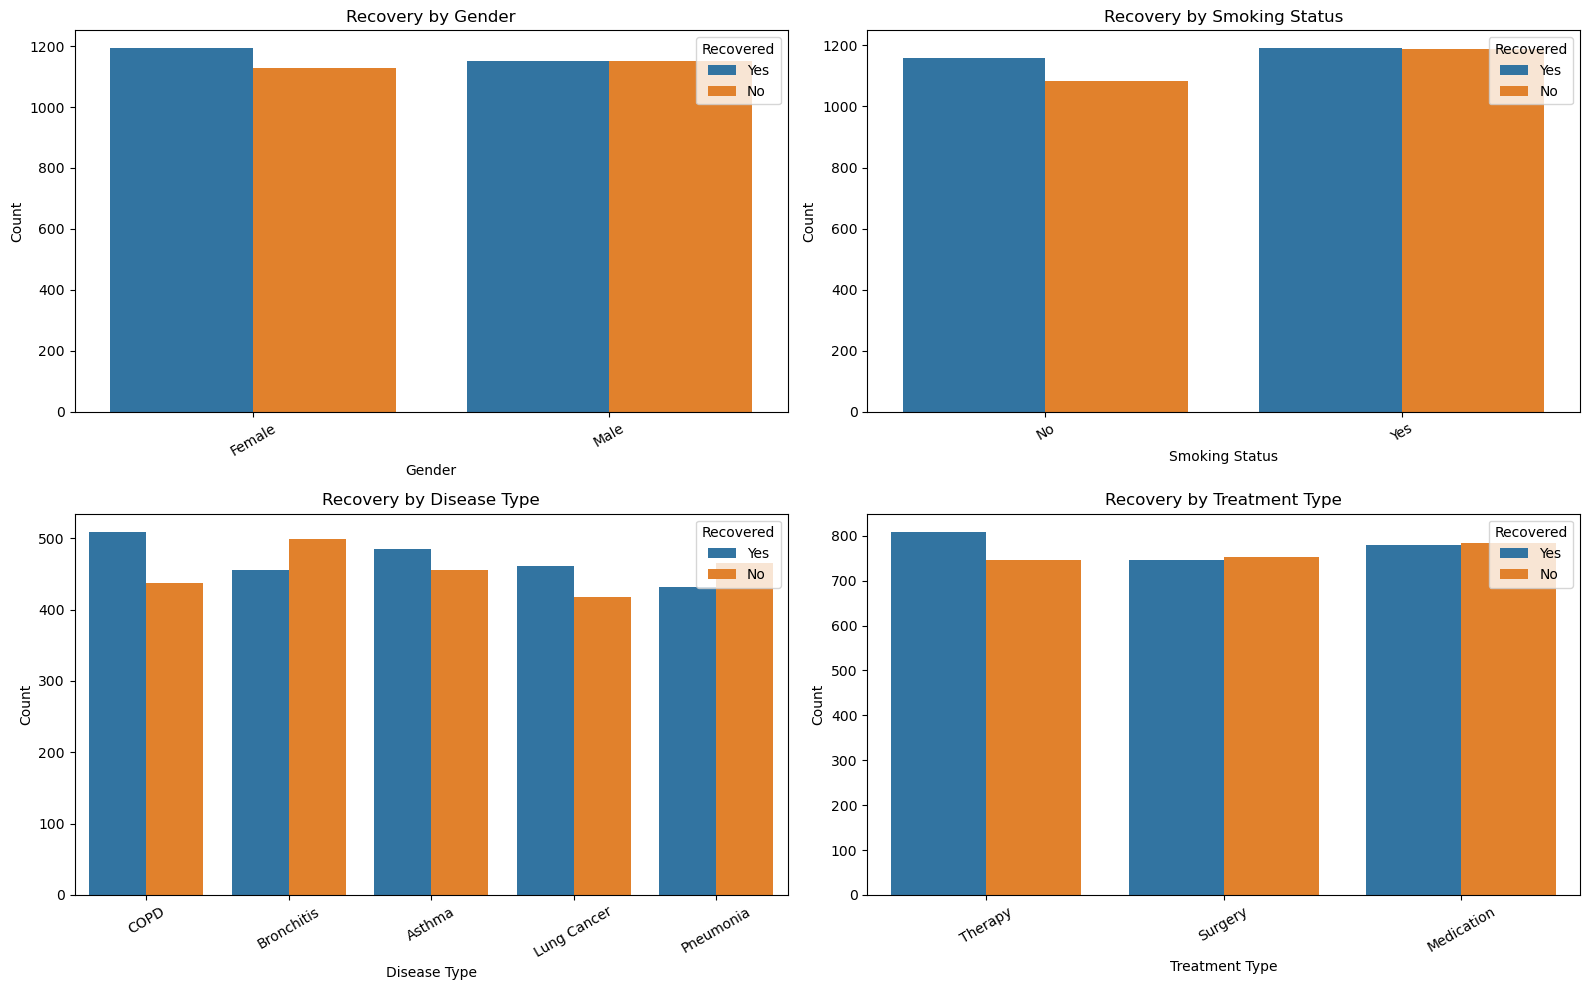

In [4]:
import seaborn as sns

categoricals = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type']
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for i, col in enumerate(categoricals):
    sns.countplot(data=df, x=col, hue='Recovered', ax=axs[i])
    axs[i].set_title(f'Recovery by {col}')
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel(col)
    axs[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

Gender: Recovery rates are slightly higher among females than males.

Smoking Status: Both smokers and non-smokers show similar recovery distributions, though non-smokers have a slightly better recovery rate.

Disease Type: Patients with Bronchitis or Asthma have the highest recovery counts, while those with Lung Cancer and COPD show notably lower recovery rates.

Treatment Type: Patients receiving Medication or Therapy tend to recover more often than those undergoing Surgery, suggesting less invasive treatments may be associated with better outcomes.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_features=['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type']

for feature in categorical_features:
    print(f"\nChi-squared test for: {feature}")
    contingency=pd.crosstab(df[feature], df['Recovered'])
    chi2, p, dof, expected=chi2_contingency(contingency)
    print(f"Chi-squared statistic: {chi2:.2f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.4f}")
    
    if p<0.05:
        print("Statistically significant relationship with Recovery")
    else:
        print("No significant relationship with Recovery")



Chi-Squared Test for: Gender
Chi-squared Statistic: 0.82
Degrees of Freedom: 1
p-value: 0.3638
→ No significant relationship with Recovery

Chi-Squared Test for: Smoking Status
Chi-squared Statistic: 1.23
Degrees of Freedom: 1
p-value: 0.2672
→ No significant relationship with Recovery

Chi-Squared Test for: Disease Type
Chi-squared Statistic: 10.73
Degrees of Freedom: 4
p-value: 0.0297
→ Statistically significant relationship with Recovery

Chi-Squared Test for: Treatment Type
Chi-squared Statistic: 1.89
Degrees of Freedom: 2
p-value: 0.3883
→ No significant relationship with Recovery


In [5]:
#summary stats of numericals
print(df[['Age', 'Lung Capacity', 'Hospital Visits']].describe())

               Age  Lung Capacity  Hospital Visits
count  4900.000000    4900.000000      4900.000000
mean     54.449796       3.501865         7.528571
std      20.126882       1.461179         3.996401
min      20.000000       1.000000         1.000000
25%      37.000000       2.220000         4.000000
50%      54.000000       3.480000         8.000000
75%      72.000000       4.800000        11.000000
max      89.000000       6.000000        14.000000


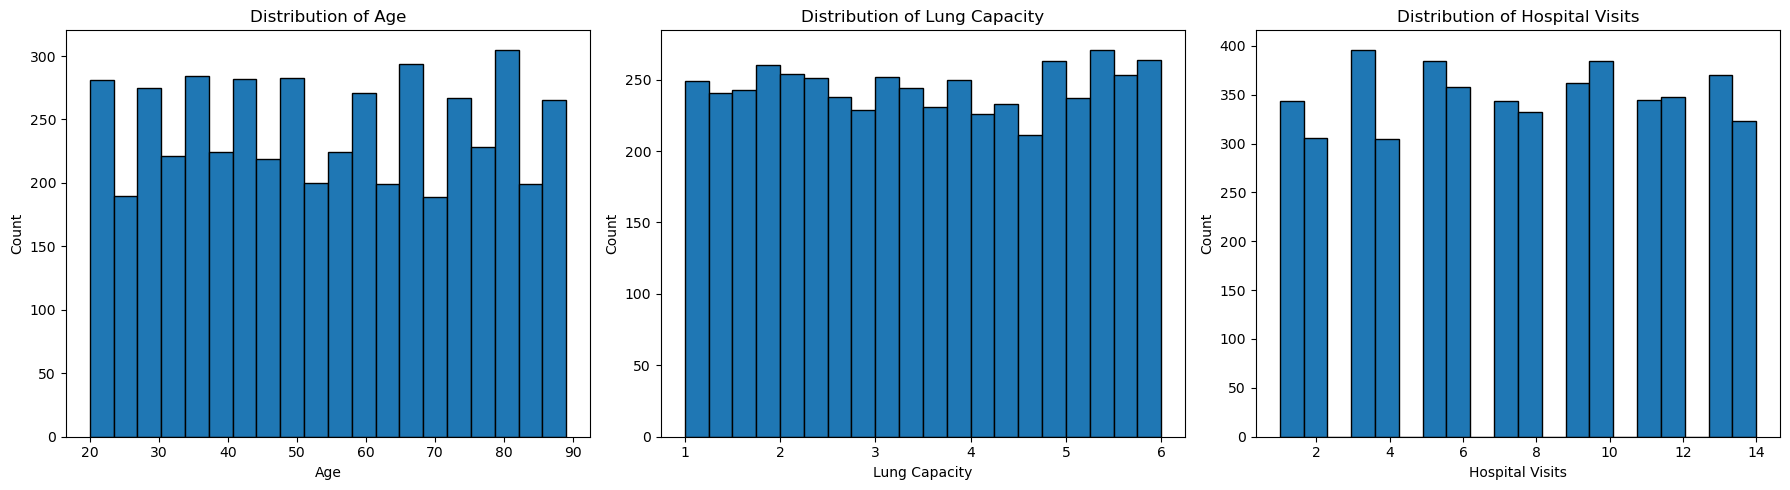

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

numericals = ['Age', 'Lung Capacity', 'Hospital Visits']
for i, col in enumerate(numericals):
    axs[i].hist(df[col], bins=20, edgecolor='black')
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Age is well-distributed across the population with a slight concentration around 50–60 years, suggesting a large portion of patients are middle-aged or older.

Lung Capacity shows an interesting peak around 3.0–3.5, possibly indicating a common clinical measurement range or treatment baseline.

Hospital Visits are fairly uniformly spread between 1 and 14, with a slight spike around 8 visits, which may correspond to standard treatment cycles or follow-up schedules.

These insights suggest that while the numeric features are not heavily skewed, their central tendencies could be informative for predicting recovery.

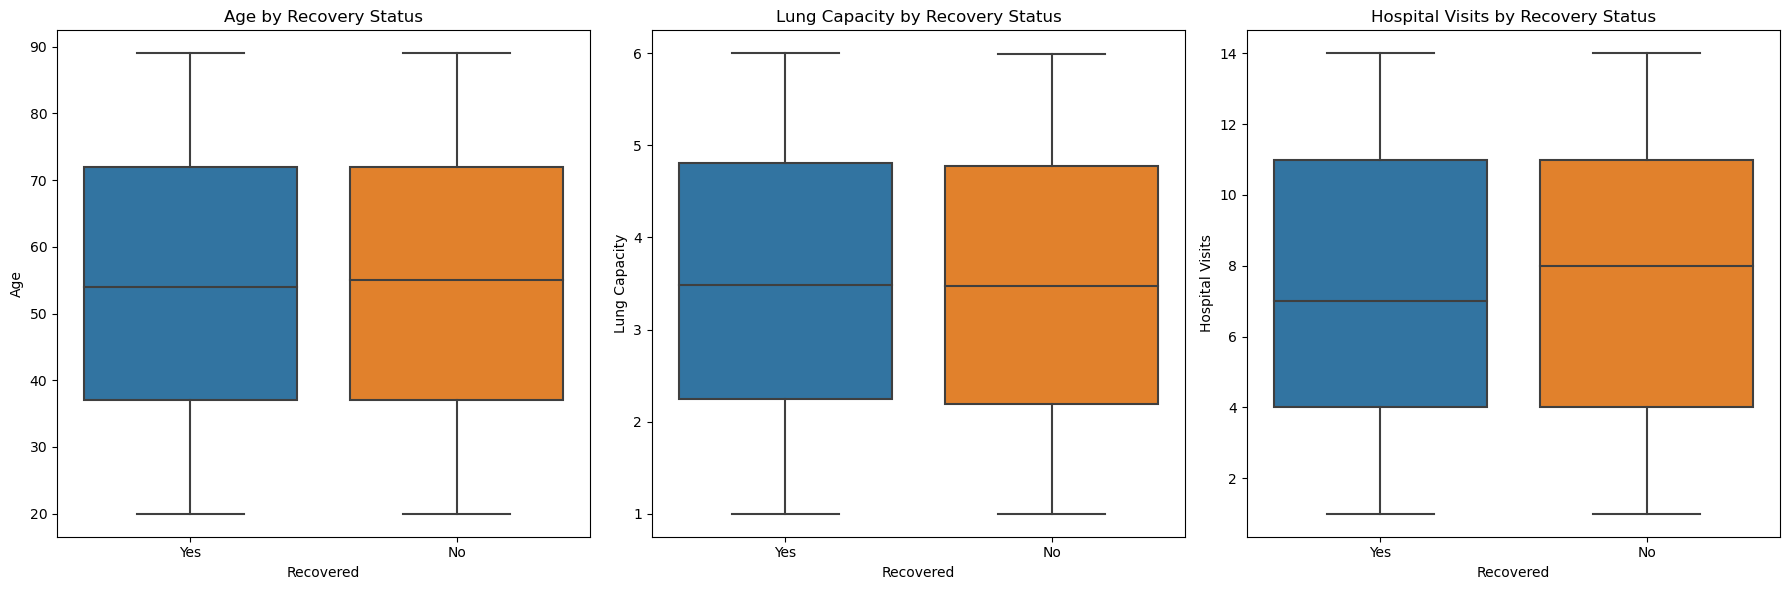

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

numeric_cols = ['Age', 'Lung Capacity', 'Hospital Visits']
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x='Recovered', y=col, ax=axs[i])
    axs[i].set_title(f'{col} by Recovery Status')
    axs[i].set_xlabel('Recovered')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

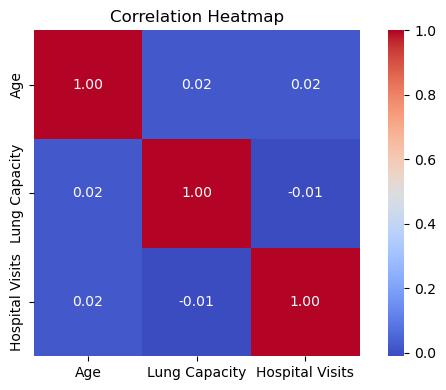

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df=df.select_dtypes(include=['int64', 'float64'])
corr_matrix=numeric_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

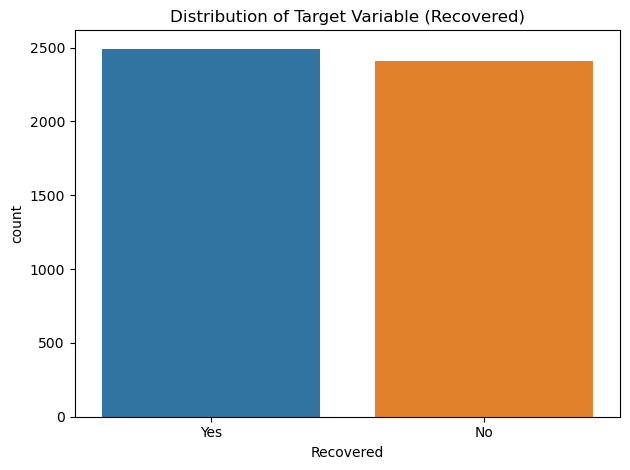

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Recovered', data=df)
plt.title('Distribution of Target Variable (Recovered)')
plt.tight_layout()
plt.show()


/Users/loganhahn/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


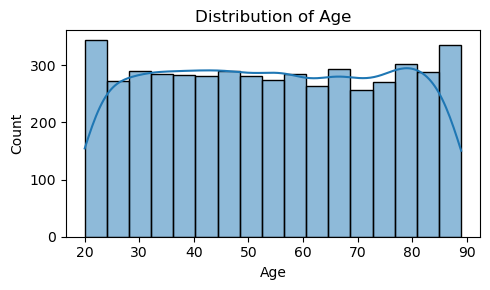

/Users/loganhahn/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


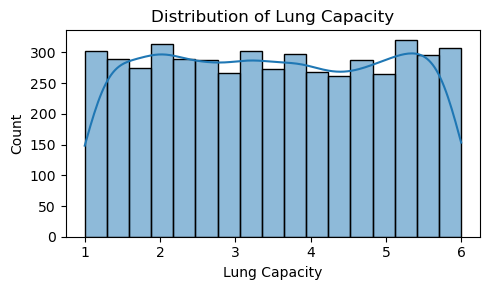

/Users/loganhahn/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


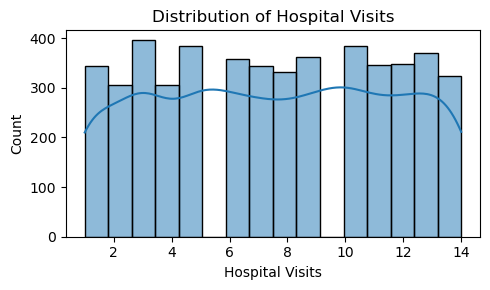

In [10]:
numerical_cols = ['Age', 'Lung Capacity', 'Hospital Visits']

for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


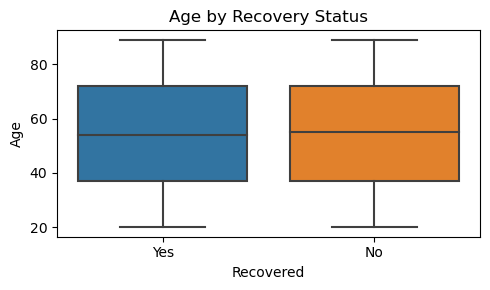

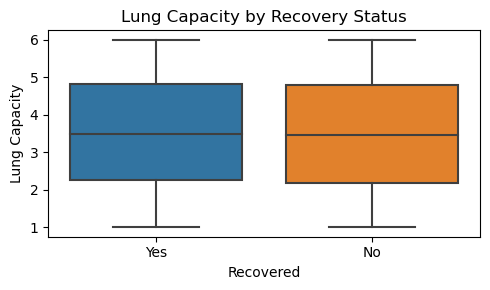

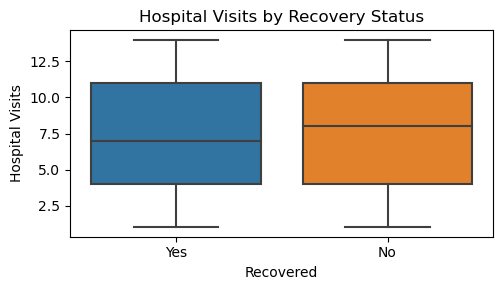

In [11]:
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='Recovered', y=col, data=df)
    plt.title(f'{col} by Recovery Status')
    plt.tight_layout()
    plt.show()


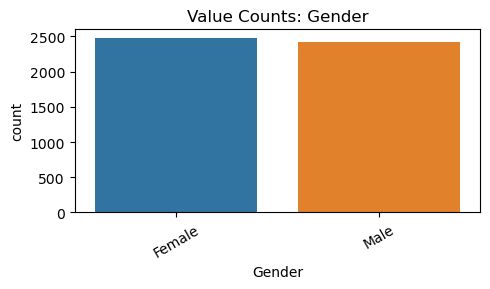

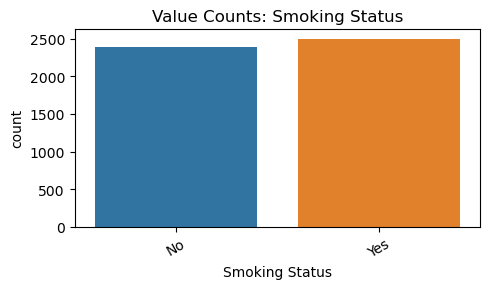

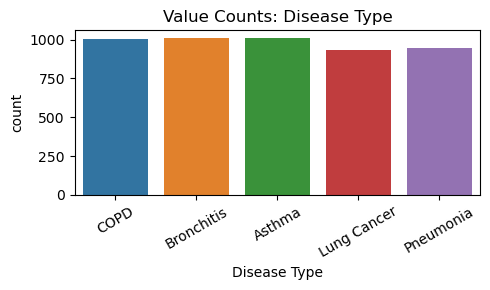

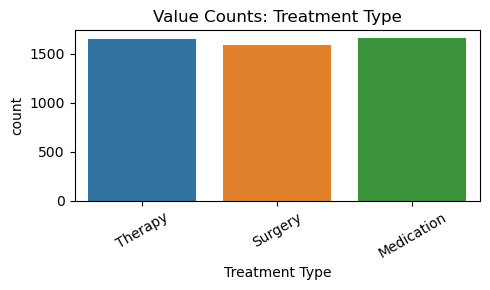

In [12]:
categorical_cols = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type']

for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df)
    plt.title(f'Value Counts: {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


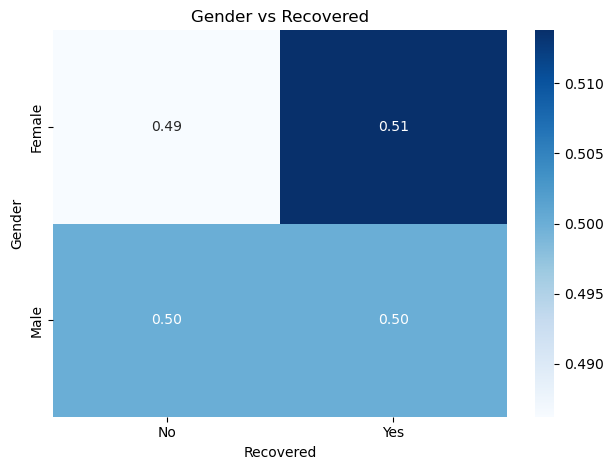

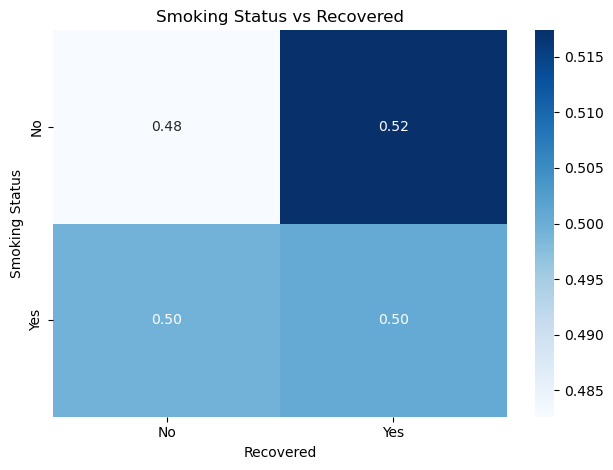

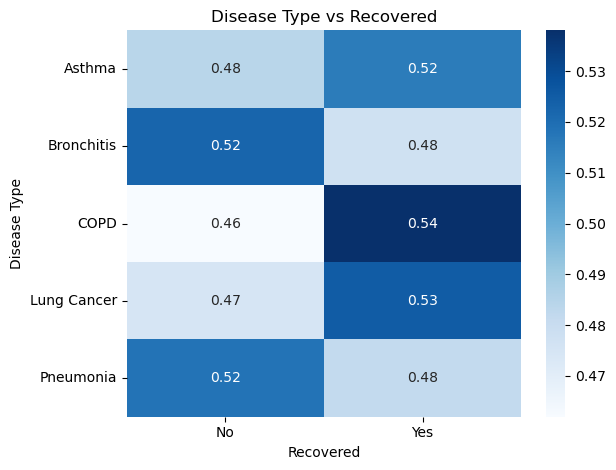

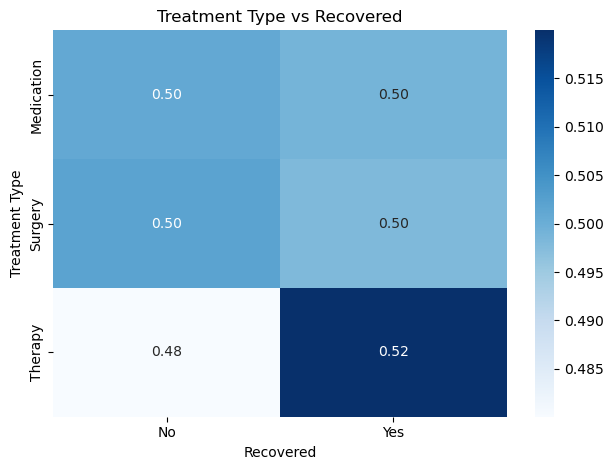

In [13]:
for col in categorical_cols:
    ctab = pd.crosstab(df[col], df['Recovered'], normalize='index')
    sns.heatmap(ctab, annot=True, cmap='Blues', fmt=".2f")
    plt.title(f'{col} vs Recovered')
    plt.ylabel(col)
    plt.xlabel('Recovered')
    plt.tight_layout()
    plt.show()


In [14]:
df.groupby('Recovered')[['Age', 'Lung Capacity', 'Hospital Visits']].mean()

,Age,Lung Capacity,Hospital Visits
Recovered,,,
No,54.448989,3.484684,7.622850
Yes,54.601876,3.514060,7.432225


<Axes: xlabel='Disease Type'>

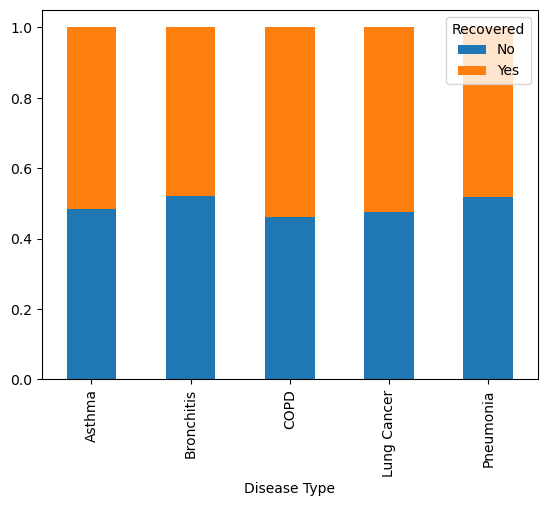

In [15]:
pd.crosstab(df['Disease Type'], df['Recovered'], normalize='index').plot(kind='bar', stacked=True)